<div align="justify">

#### Actividad de Seguimiento2: El juego de la vida
<p><img alt="UdeA logo" height="200px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="right" hspace="10px" vspace="0px"></p>

<div align="left">

Física Computacional 1 Sem: 2024-1
* Sara A. Carvajal CC. 1193090281
* Valentina Lobo Ruiz CC. 1067912559
* Dayana Henao C.C 1001469185

Instituto de Física - UdeA


In [3]:
#Importar librerias 
import random
import numpy as np
import matplotlib.pyplot as plt

1. Implementar el juego de la vida con dos especies tal cual fue descrito en clase.

2. Modificar a su gusto alguna de las siguientes reglas:
* Condición de nacimiento: Pueden cambiar los números requeridos para que una célula muerta nazca como célula tipo A o B.
* Condición de muerte: Pueden decidir incrementar la competencia, es decir, cambiar la condición de que si una célula tiene pocos vecinos de otro tipo de célula entonces muere. Ejemplo, si una célula tipo A tiene solo un vecino tipo B muere. 
* Condición adicional de competencia: Pueden incluir una condición adicional en la que una célula se alimente de otra para incluir una dinámica de cazador-presa. Por ejemplo, si una célula A está rodeada por dos células B esta cambia a ser célula tipo B. Sería similar a considerar que las células B fagocitaron la célula A y se produjeron una nueva célula B en su lugar.

In [102]:


def new_board(x, y, num_live_cellsA=2, num_live_cellsB=2):
    """Initializes a board for Conway's Game of Life"""
    board = []
    for i in range(0, y):
        # Defaults to a 3:2 dead cell:live cell ratio
        board.append([random.choice([1] * num_live_cellsA + [2] * num_live_cellsB + [0]*(10-num_live_cellsA-num_live_cellsB)) for _ in range(0, x)]) 
    return board


def get(board, x, y):
    """Return the value at location (x, y) on a board, wrapping around if out-of-bounds"""
    return board[y % len(board)][x % len(board[0])]


def assign(board, x, y, value):
    """Assigns a value at location (x, y) on a board, wrapping around if out-of-bounds"""
    board[y % len(board)][x % len(board[0])] = value



def count_neighbors(board, x, y):
    """Counts the number of living neighbors a cell at (x, y) on a board has"""
    
    vecinos=[get(board, x - 1, y),
        get(board, x + 1, y),
        get(board, x, y - 1),
        get(board, x, y + 1),
        get(board, x + 1, y + 1),
        get(board, x + 1, y - 1),
        get(board, x - 1, y + 1),
        get(board, x - 1, y - 1)]
    
    type_1 = []
    type_2=[]
    for i in vecinos:
        if i == 1:
            type_1.append(i)
        elif i==2:
            type_2.append(i)

    num_neighborsA = len(type_1)
    num_neighborsB = len(type_2)
    return num_neighborsA, num_neighborsB


def process_life(board):
    """Creates the next iteration from a passed state of Conway's Game of Life"""
    next_board = new_board(len(board[0]), len(board))
    for y in range(0, len(board)):
        for x in range(0, len(board[y])):
            num_neighborsA, num_neighborsB = count_neighbors(board, x, y)
            is_aliveA = get(board, x, y) == 1
            is_aliveB = get(board, x, y) == 2
            is_dead = get(board, x, y) == 0
            
            # Muerte
            if ((num_neighborsA < 2 and is_aliveA) or (num_neighborsA > 3 and is_aliveA)) or (num_neighborsB > 2 and is_aliveA):
                assign(next_board, x, y, 0)
            elif ((num_neighborsB < 2 and is_aliveB) or (num_neighborsB > 3 and is_aliveB)) or (num_neighborsA > 2 and is_aliveB):
                assign(next_board, x, y, 0)
            
            # Supervivencia
            elif (2 <= num_neighborsA <= 3 and num_neighborsB <= 2 and is_aliveA):
                assign(next_board, x, y, 1)
            
            elif (2 <= num_neighborsB <= 3 and num_neighborsA <= 2 and is_aliveB):
                assign(next_board, x, y, 2)
            
            # Nacimiento
            elif (num_neighborsA == 3 and num_neighborsB <= 2 and  is_dead):
                assign(next_board, x, y, 1)
            elif (num_neighborsB == 3 and num_neighborsA <= 2 and  is_dead):
                assign(next_board, x, y, 2)
                
            # Competencia 
            elif (num_neighborsB == 2 and is_aliveA):
                assign(next_board, x, y, 2)
            elif (num_neighborsA == 2 and is_aliveB):
                assign(next_board, x, y, 1)

            
            else:
                assign(next_board, x, y, 0)
    return next_board

La nueva regla implementada será una condición de competencia. Funciona de tal manera que si una célula de tipo A está rodeada por dos vecinos de tipo B, esta pasa a ser tipo B. De igual manera, si una célula de tipo B está rodeada por dos vecinos de tipo A, entonces esta pasa a ser tipo A.  

In [104]:
from IPython.display import clear_output
import time

def draw_board(board):
    res = ''
    for row in board:
        for col in row:
            if col == 1:
                res += '1'
            elif col == 2:
                res += '2'
            else:
                res += ' '
        res += '\n'
    return res

board = new_board(50, 50)

NUM_ITERATIONS = 1000

for i in range(0, NUM_ITERATIONS):
    print('Iteration ' + str(i + 1))
    board = process_life(board)
    res = draw_board(board)
    print(res)
    time.sleep(0.2)
    clear_output(wait=True)

Iteration 1000
                                                  
                                              11  
                                             1  1 
                                             1 1  
11   11                                       1   
11   11                                           
                                                  
                      22                          
        22           2  2                         
        22           2  2                         
                      22                          
                                                  
  1                                               
 1 1                                     11       
  11                                     11       
                  22                              
     11           22                              
     11                              111          
                                                  
                

3. Obtener las distribuciones *(histogramas normalizados a la unidad)* del número de células A y B para todo el histórico de 1000 iteraciones. Hint: Pueden utilizar:

In [105]:

def contador_poblaciones(board):
    """Esta función entrega la cantidad de celulas tipo A, tipo B y células muertas que hay un tablero
    NA: cantidad de células tipo A
    NB: cantidad de células tipo B
    ND: cantidad de células muertas"""
    
    NA = 0
    NB = 0
    ND = 0
    
   
    res = draw_board(board)
    for i in res:
        if i == '1':
            NA += 1
        elif i== '2':
            NB +=1
        elif i == "\n":
            ND += 0
        else:
            ND+=1

    return NA, NB, ND 

In [106]:
NUM_ITERATIONS = 1000
NA_iter = []
NB_iter = []
iter = np.arange(0, NUM_ITERATIONS+1, 1)
board = new_board(50, 50)
for i in range(0, NUM_ITERATIONS+1):
    board = process_life(board)
    NA, NB, ND = contador_poblaciones(board)
    NA_iter.append(NA)
    NB_iter.append(NB)

NT = NA + NB + ND
NA_iter = np.array(NA_iter)
NB_iter = np.array(NB_iter)


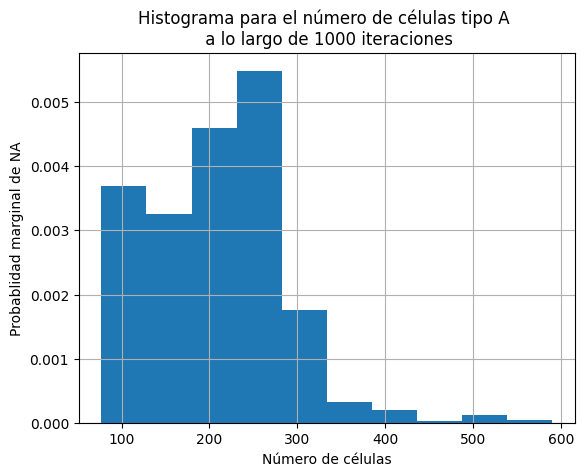

In [100]:

histA = plt.hist(NA_iter, density = True)
pA, binsA = histA[0], histA[1]
plt.title(f"Histograma para el número de células tipo A \n a lo largo de {NUM_ITERATIONS} iteraciones")
plt.xlabel("Número de células")
plt.ylabel("Probablidad marginal de NA")
plt.grid()

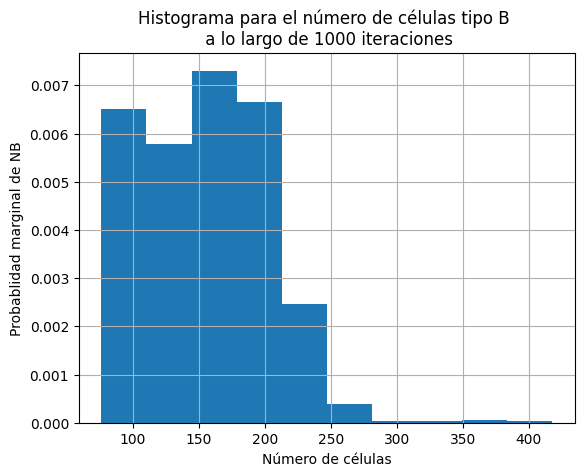

In [107]:
histB = plt.hist(NB_iter, density = True)
pB, binsB = histB[0], histB[1]
plt.title(f"Histograma para el número de células tipo B \n a lo largo de {NUM_ITERATIONS} iteraciones")
plt.xlabel("Número de células")
plt.ylabel("Probablidad marginal de NB")
plt.grid()

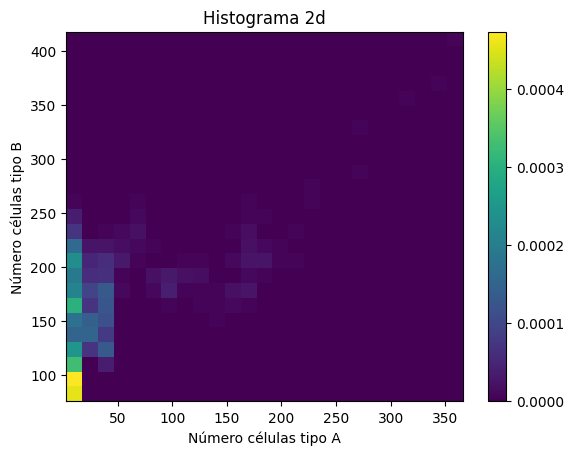

In [108]:
hist2d =plt.hist2d(NA_iter, NB_iter, bins = (25, 25), density= True)
frec, NA_bordes, NB_bordes = hist2d[0], hist2d[1], hist2d[2]
plt.xlabel("Número células tipo A")
plt.ylabel("Número células tipo B")
plt.title("Histograma 2d")
plt.colorbar()

4. Considere el sistema como descrito por el estado $N_A$ y $N_B$, donde $N_A$ es el número de células tipo A y $N_B$ es el número de células tipo B. Si llamamos a $N_T$ el número total de casillas del tablero del juego, tenga en cuenta que $N_A+N_B \leq N_T$. De la misma forma el número de células muertas es $N_T-N_A-N_B$.
Tenga presente que como las dos especies de células interactúan **es previsible que la probabilidad de encontrar un número de células A no sea independiente de encontrar un número de células B**, en otras palabras $N_A$ y $N_B$ están correlacionados, y, por lo tanto, lo mejor es utilizar la probabilidad 2-dimensional como distribución de probabilidad de los estados del sistema y no las probabilidades marginales de cada variable separadamente.

* Desarrollo: Haciendo uso del inciso 3 obtendremos la función de probabilidad para los valores de frecuencias dado. 

In [109]:
probabilidades = frec

# Creamos la funcion de probabilidad a partir de las probabilidades obtenidas

def func_probabilidad(NA, NB, probabilidades, NA_bordes, NB_bordes):
    probabilidad = 0  # Inicializamos la probabilidad

    # Encuentra el índice del bin correspondiente al valor de NA
    indice_bin_x = np.digitize(NA, NA_bordes) 
    # Encuentra el índice del bin correspondiente al valor de NB
    indice_bin_y = np.digitize(NB, NB_bordes) 
    
    # Asegurarse de que los índices están dentro de los límites de probabilidades
    if 0 <= indice_bin_x < len(probabilidades) and 0 <= indice_bin_y < len(probabilidades[0]):
        # Calcular la probabilidad para los índices de NA y NB
        probabilidad = probabilidades[indice_bin_x][indice_bin_y]
    else:
        # Asignar probabilidad cero si los índices están fuera de rango
        probabilidad = 0
            
    # Retorna la lista de probabilidades calculadas
    return probabilidad


5. Utilizando las distribuciones obtenidas en el punto 3 y teniendo en cuenta lo señalado en el punto 4, utilice el algoritmo de Metrópolis para generar una serie de estados del sistema.


In [110]:
#Codigo de Metropolis
phi_0 = np.random.randint(max(NA_bordes))
phi_1 = np.random.randint(max(NB_bordes))

phi_A =[phi_0]
phi_B= [phi_1]

# Algoritmo de Metropolis 2D
while len(phi_A) < 1000:
    phi_p_A = np.random.randint(max(NA_bordes))
    phi_p_B = np.random.randint(max(NB_bordes))

    prob_p = func_probabilidad(phi_p_A, phi_p_B, probabilidades, NA_bordes, NB_bordes)
    prob_actual = func_probabilidad(phi_A[-1], phi_B[-1], probabilidades, NA_bordes, NB_bordes)

    # Calcular el cambio de S
    d_S = -np.log(prob_p / prob_actual)

    # Aceptar o rechazar propuestas según el criterio de Metropolis

    if d_S < 0:
        phi_A.append(phi_p_A)
        phi_B.append(phi_p_B)
    elif d_S > 0:
        r = np.random.random()
        if r < prob_p / prob_actual:
            phi_A.append(phi_p_A)
            phi_B.append(phi_p_B)


/tmp/ipykernel_16314/540016049.py:17: RuntimeWarning: divide by zero encountered in log
  d_S = -np.log(prob_p / prob_actual)


6. Grafique la probabilidad 2-dimensional de los estados generados con el algoritmo de Metrópolis y muestre cualitativamente que la distribución obtenida es similar a la del punto 3.

Text(0.5, 1.0, '$Generacion\\ de\\ 1000\\ eventos\\ aleatorios$')

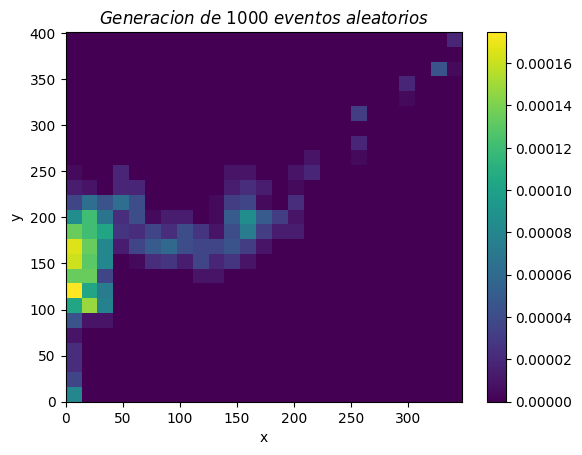

In [111]:
plt.hist2d(phi_A,phi_B, bins=(25,25), density= True);
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(r'$Generacion\ de\ 1000\ eventos\ aleatorios$')
